# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Goal of the notebook

this notebook focuses on feature selection 

 #  Initial setup and modules/packages loading

In [101]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import re

from Feature_selection_Functions import *


import importlib
imported_module = importlib.import_module("Feature_selection_Functions")
importlib.reload(imported_module)

<module 'Feature_selection_Functions' from '/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Feature_selection_Functions.py'>

# Importing Data

In [102]:
df_market = pd.read_csv("../Data/df_market.csv")
info_market = pd.read_csv("../Data/info_market.csv")

sales_agg1 = pd.read_csv("../Data/sales_agg1.csv")
sales_agg3 = pd.read_csv("../Data/sales_agg3.csv")
sales_agg4 = pd.read_csv("../Data/sales_agg4.csv")
sales_agg5 = pd.read_csv("../Data/sales_agg5.csv")
sales_agg6 = pd.read_csv("../Data/sales_agg6.csv")
sales_agg8 = pd.read_csv("../Data/sales_agg8.csv")
sales_agg9 = pd.read_csv("../Data/sales_agg9.csv")
sales_agg11 = pd.read_csv("../Data/sales_agg11.csv")
sales_agg12 = pd.read_csv("../Data/sales_agg12.csv")
sales_agg13 = pd.read_csv("../Data/sales_agg13.csv")
sales_agg14 = pd.read_csv("../Data/sales_agg14.csv")
sales_agg16 = pd.read_csv("../Data/sales_agg16.csv")
sales_agg20 = pd.read_csv("../Data/sales_agg20.csv")
sales_agg36 = pd.read_csv("../Data/sales_agg36.csv")



# **Step 1** Feature selection **step 1** using cross correlation 

In this first step, the goal is to check for cross-correlation to determine if lagged market features correlate with sales. This step is performed to reduce the number of features for the next step of feature selection.  
- The maximum lag is set to 6, meaning we only look at the 6 months prior, as we assume that business reactions to "market_data" are relatively fast.  
- The correlation threshold is set to 0.5, as we aim to capture a somewhat strong correlation between the variables.

## Product Group 1

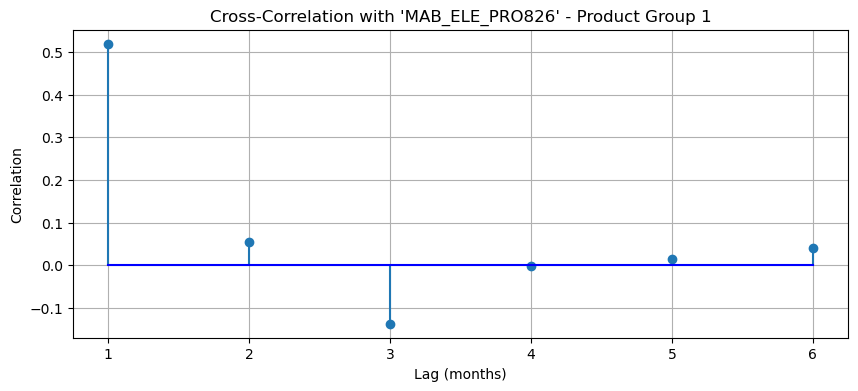

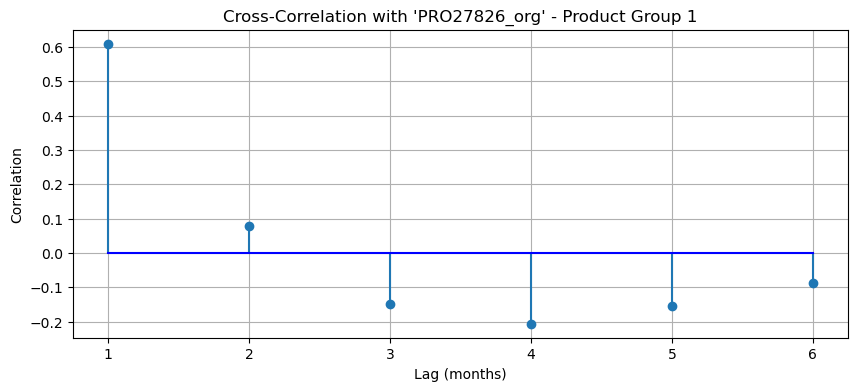

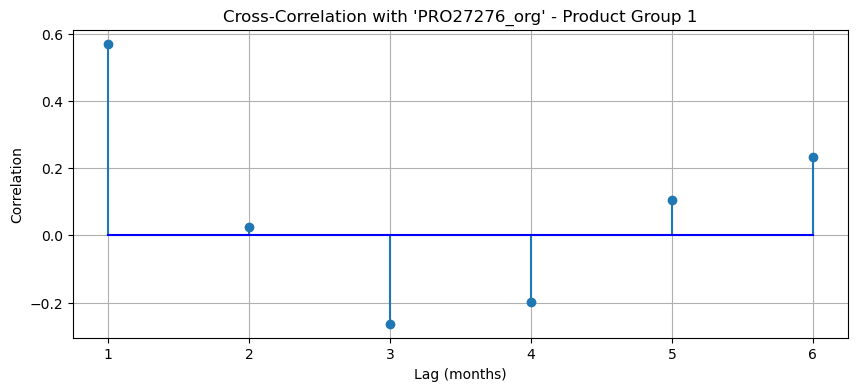

Selected Features for Product Group:
['MAB_ELE_PRO826', 'PRO27826_org', 'PRO27276_org']


In [103]:
relevant_corr_1, selected_features_1 = plot_cross_correlation(
    sales_df=sales_agg1,
    market_df=df_market,
    product_group=1,
    max_lag=6,
    threshold=0.5
)


In [104]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_1)]

filtered_info_market

,Region,Index Name,Index Code
12,United Kingdom,Production Index Machinery & Electricals,MAB_ELE_PRO826
42,United Kingdom,Electrical equipment,PRO27826_org
46,Germany,Electrical equipment,PRO27276_org


## Product Group 3

In [105]:
relevant_corr_3, selected_features_3 = plot_cross_correlation(
    sales_df=sales_agg3,
    market_df=df_market,
    product_group=3,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [106]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_3)]

filtered_info_market

,Region,Index Name,Index Code


## Product Group 4

In [107]:
relevant_corr_4, selected_features_4 = plot_cross_correlation(
    sales_df=sales_agg4,
    market_df=df_market,
    product_group=4,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [108]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_4)]

filtered_info_market

,Region,Index Name,Index Code


## Product Group 5

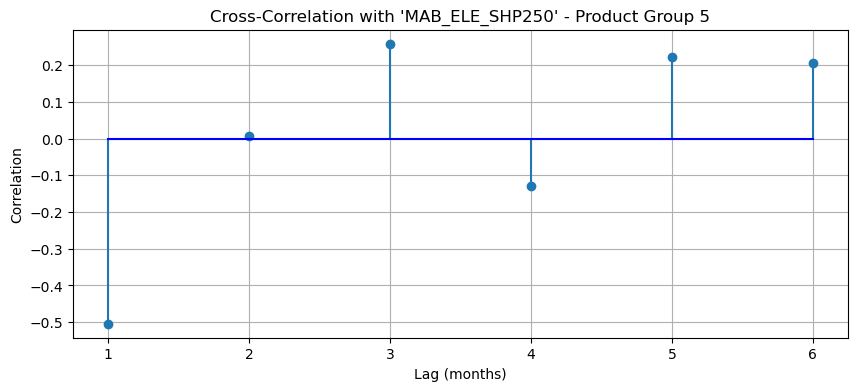

Selected Features for Product Group:
['MAB_ELE_SHP250']


In [109]:
relevant_corr_5, selected_features_5 = plot_cross_correlation(
    sales_df=sales_agg5,
    market_df=df_market,
    product_group=5,
    max_lag=6,
    threshold=0.5
)

In [110]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_5)]

filtered_info_market

,Region,Index Name,Index Code
3,France,Shipments Index Machinery & Electricals,MAB_ELE_SHP250


## Product Group 6

In [111]:
relevant_corr_6, selected_features_6 = plot_cross_correlation(
    sales_df=sales_agg6,
    market_df=df_market,
    product_group=6,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [112]:


filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_6)]

filtered_info_market

,Region,Index Name,Index Code


## Product Group 8

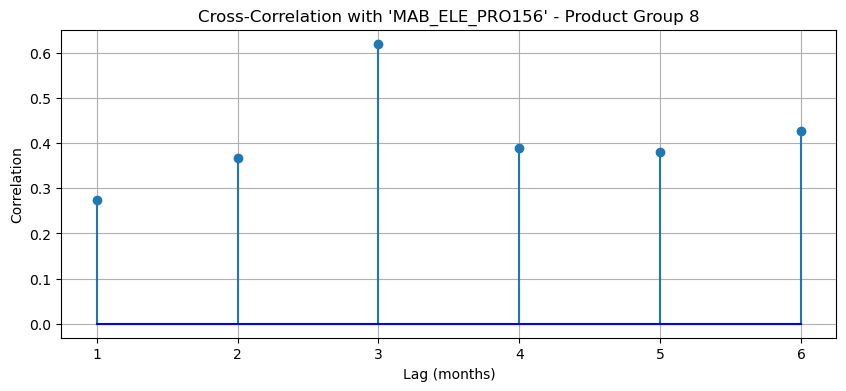

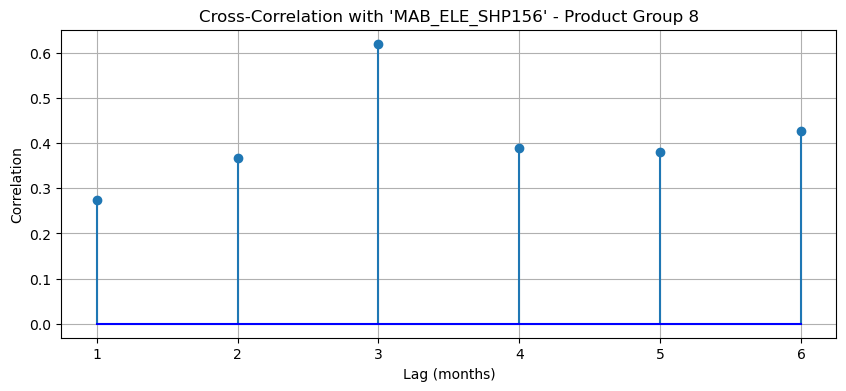

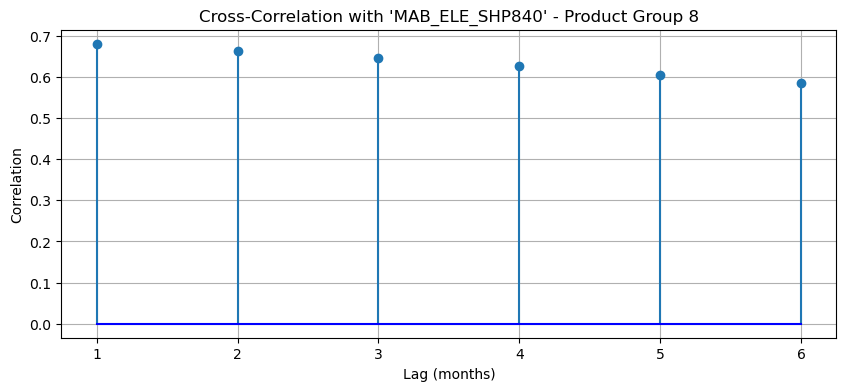

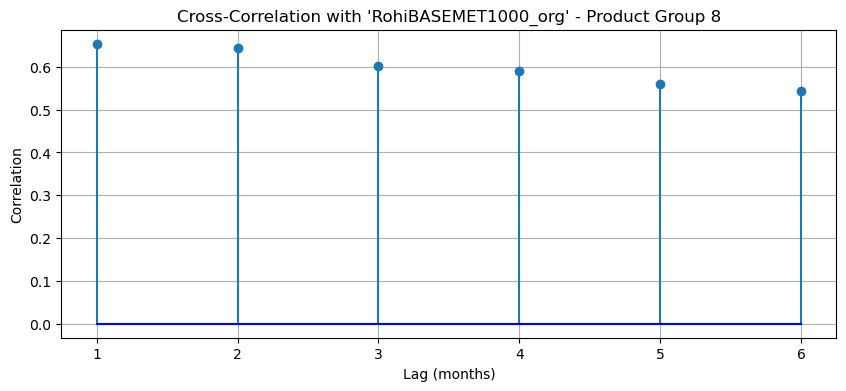

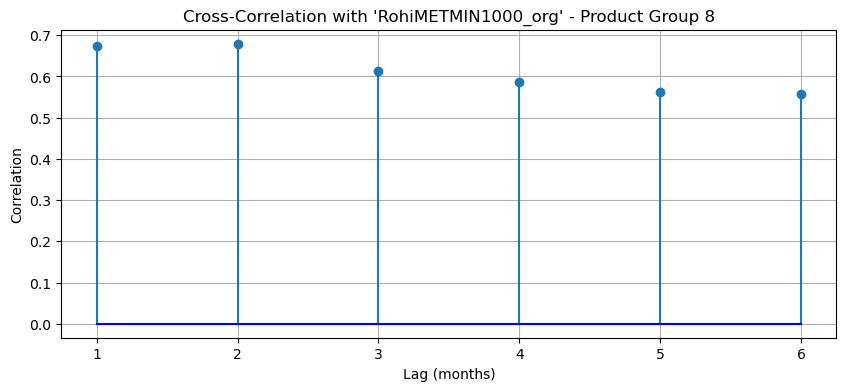

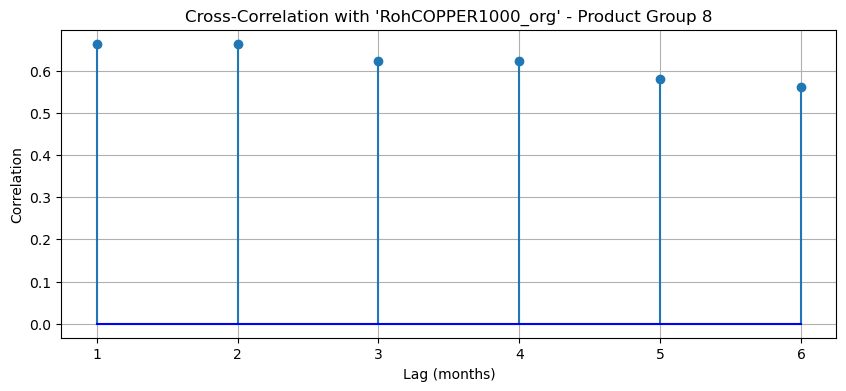

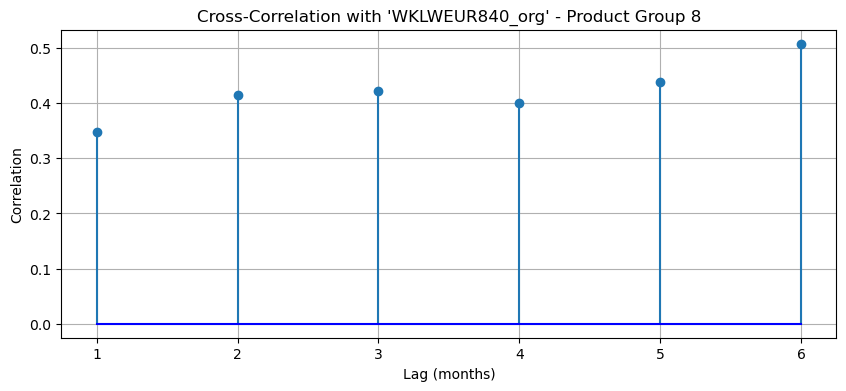

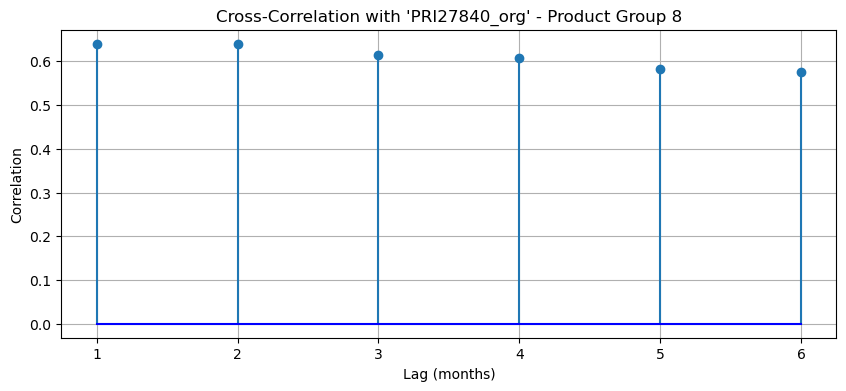

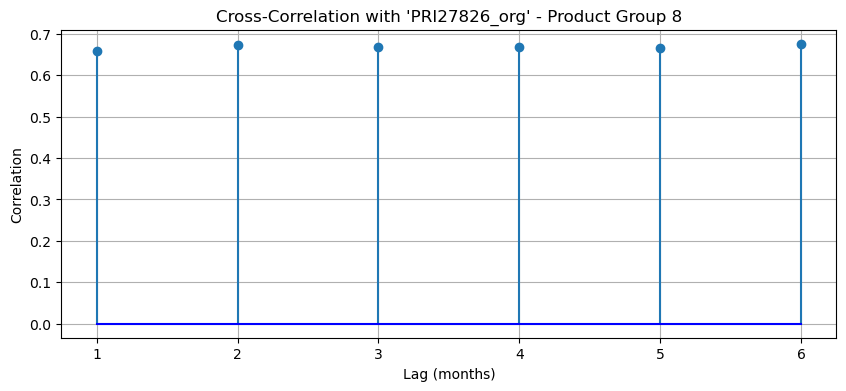

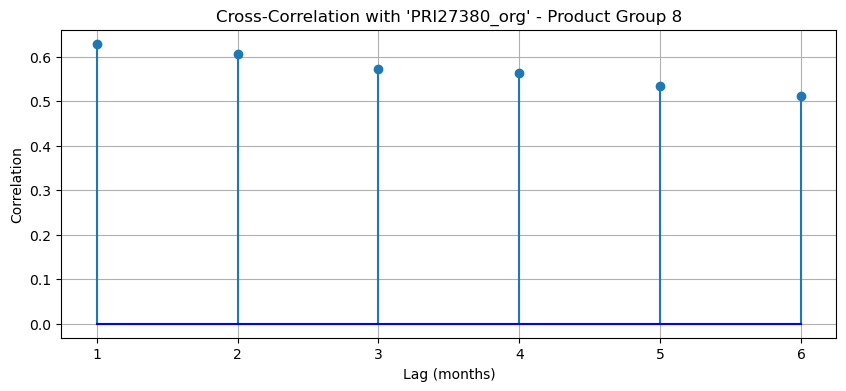

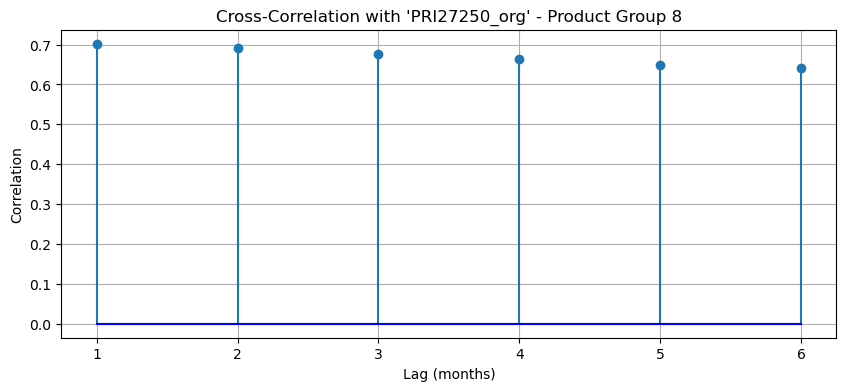

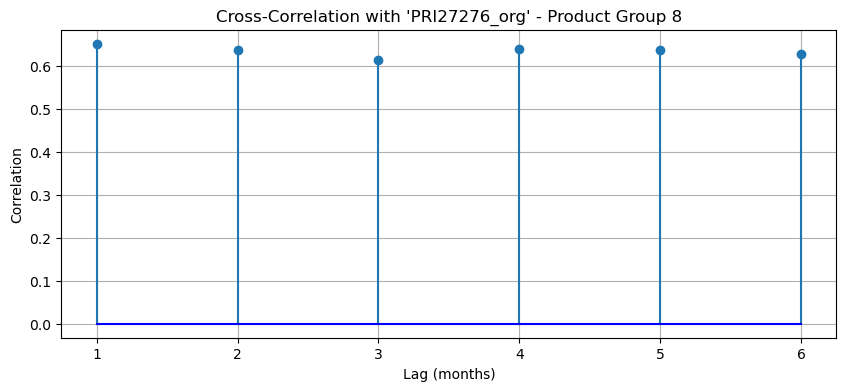

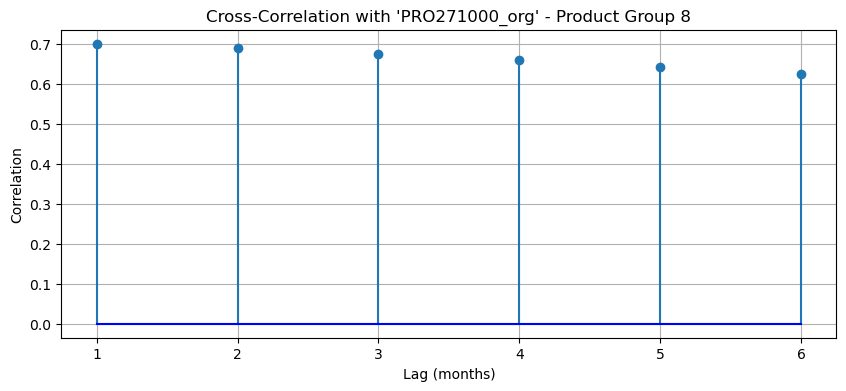

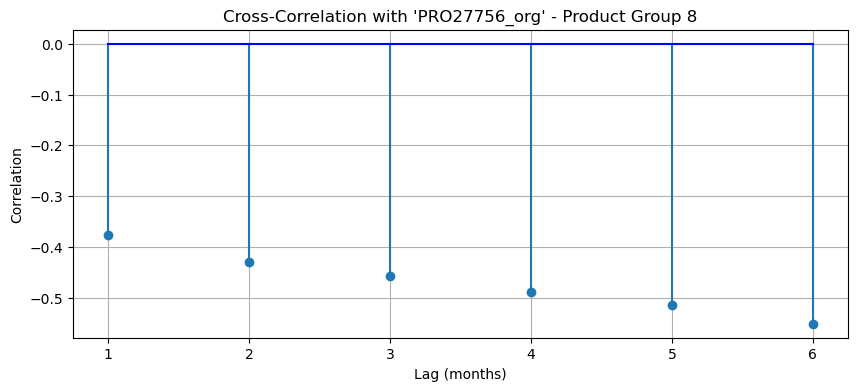

Selected Features for Product Group:
['MAB_ELE_PRO156', 'MAB_ELE_SHP156', 'MAB_ELE_SHP840', 'RohiBASEMET1000_org', 'RohiMETMIN1000_org', 'RohCOPPER1000_org', 'WKLWEUR840_org', 'PRI27840_org', 'PRI27826_org', 'PRI27380_org', 'PRI27250_org', 'PRI27276_org', 'PRO271000_org', 'PRO27756_org']


In [113]:
relevant_corr_8, selected_features_8 = plot_cross_correlation(
    sales_df=sales_agg8,
    market_df=df_market,
    product_group=8,
    max_lag=6,
    threshold=0.5
)

In [114]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_8)]

filtered_info_market

,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
15,United States,Shipments Index Machinery & Electricals,MAB_ELE_SHP840
18,World,Price of Base Metals,RohiBASEMET1000_org
20,World,Price of Metals & Minerals,RohiMETMIN1000_org
23,World,Price of Copper,RohCOPPER1000_org
24,United States,EUR in LCU,WKLWEUR840_org
25,United States,Electrical equipment,PRI27840_org
26,United Kingdom,Electrical equipment,PRI27826_org
27,Italy,Electrical equipment,PRI27380_org


## Product Group 9

In [115]:
relevant_corr_9, selected_features_9 = plot_cross_correlation(
    sales_df=sales_agg9,
    market_df=df_market,
    product_group=9,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [116]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_9)]

filtered_info_market

,Region,Index Name,Index Code


## Product Group 11

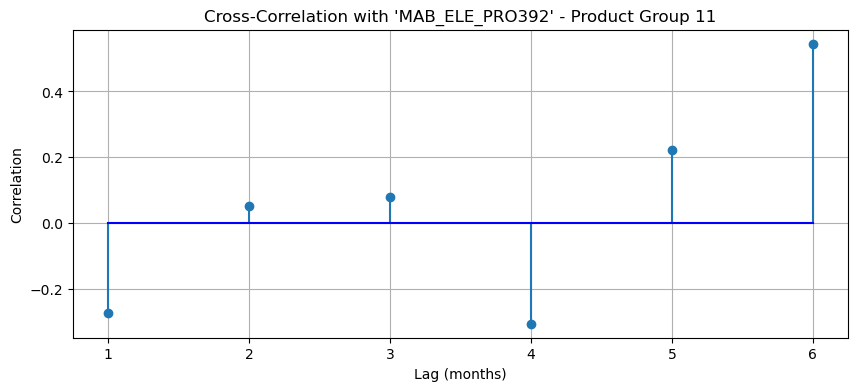

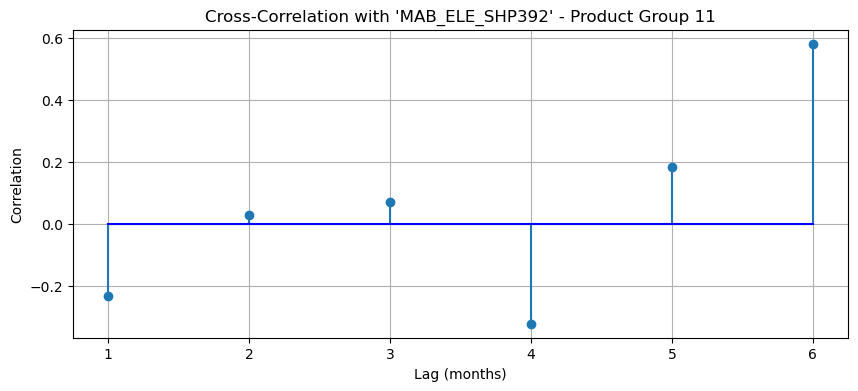

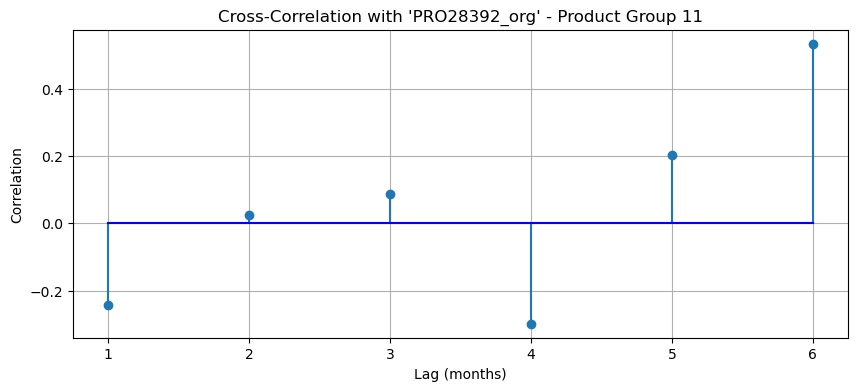

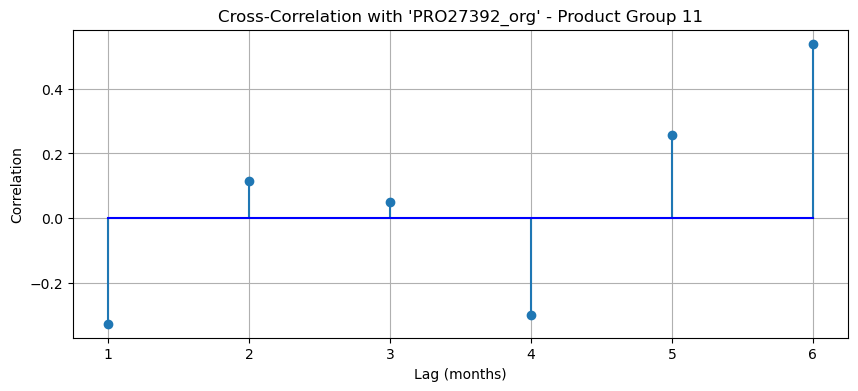

Selected Features for Product Group:
['MAB_ELE_PRO392', 'MAB_ELE_SHP392', 'PRO28392_org', 'PRO27392_org']


In [117]:
relevant_corr_11, selected_features_11 = plot_cross_correlation(
    sales_df=sales_agg11,
    market_df=df_market,
    product_group=11,
    max_lag=6,
    threshold=0.5
)

In [118]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_11)]

filtered_info_market

,Region,Index Name,Index Code
8,Japan,Production Index Machinery & Electricals,MAB_ELE_PRO392
9,Japan,Shipments Index Machinery & Electricals,MAB_ELE_SHP392
36,Japan,Machinery and equipment n.e.c.,PRO28392_org
44,Japan,Electrical equipment,PRO27392_org


## Product Group 12

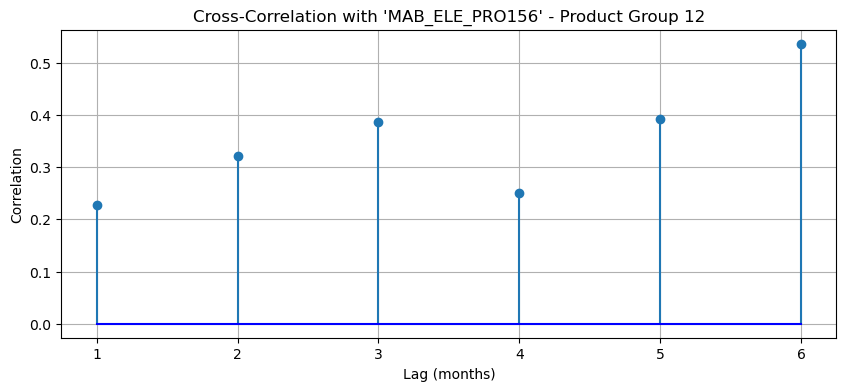

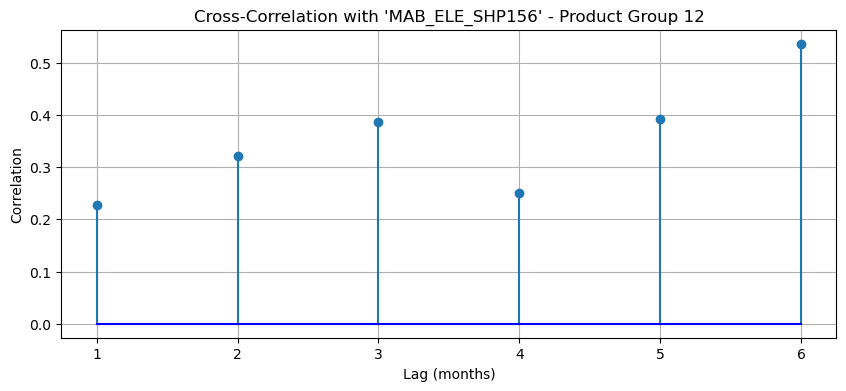

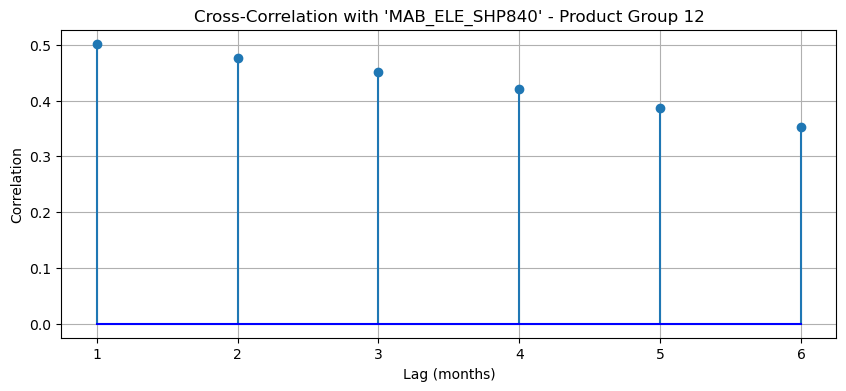

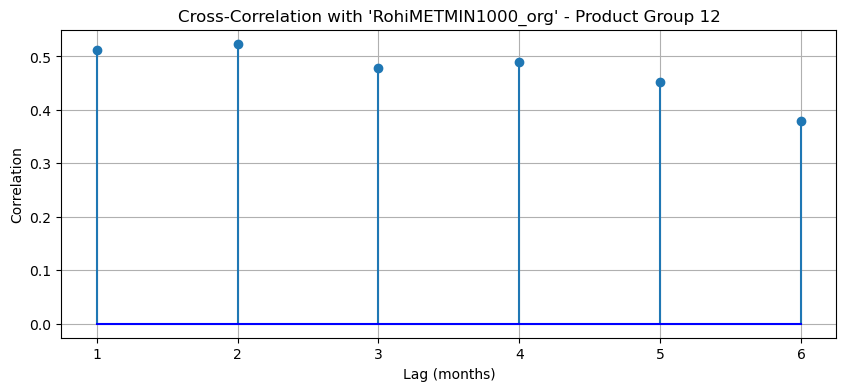

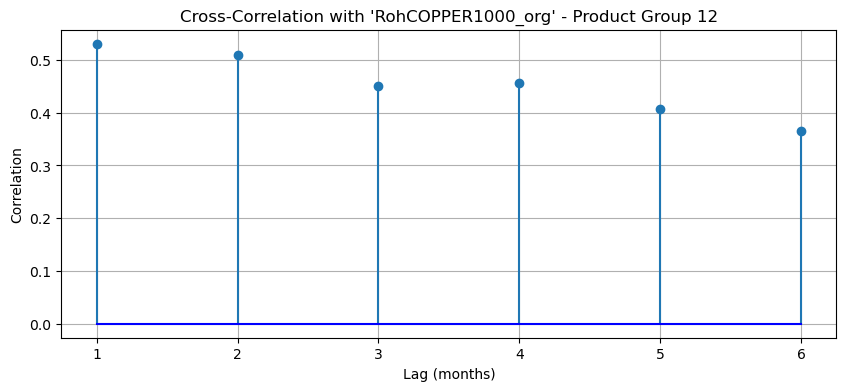

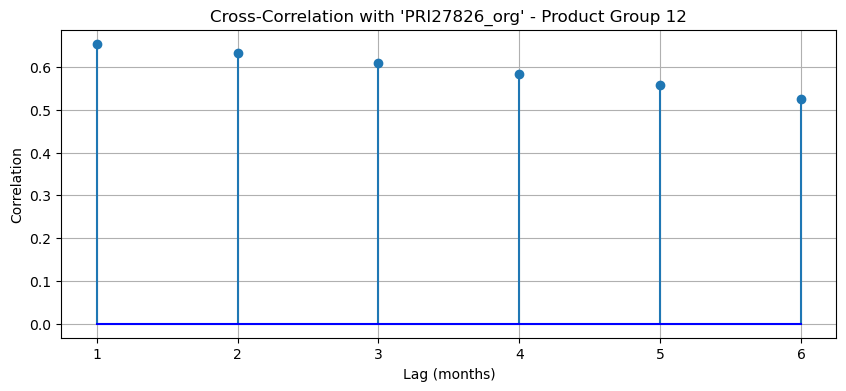

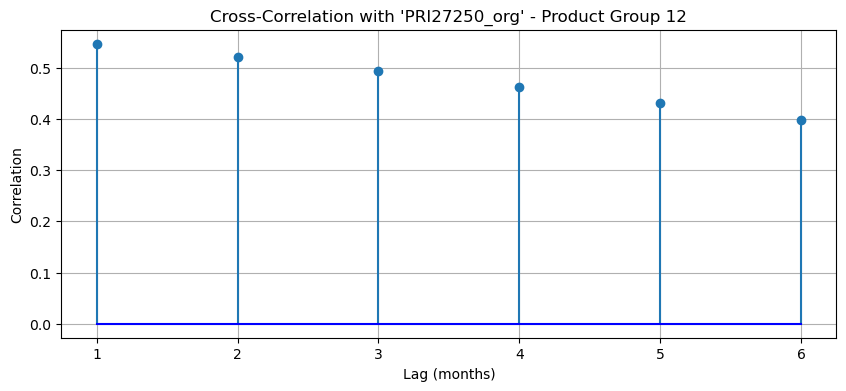

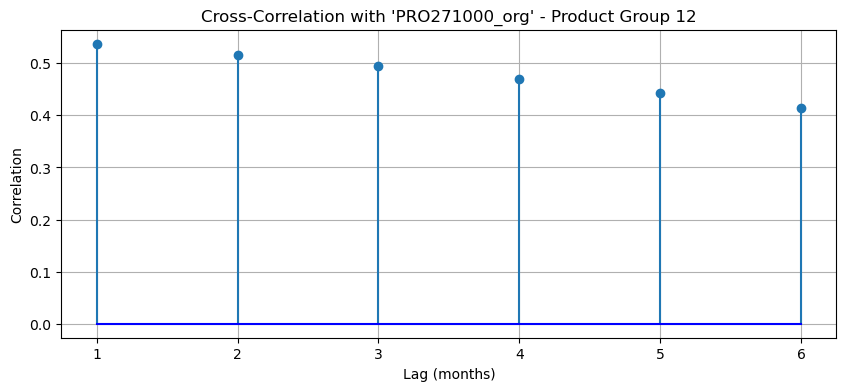

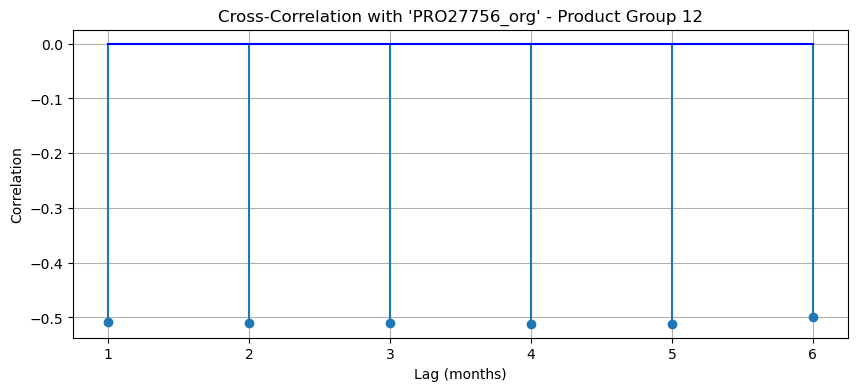

Selected Features for Product Group:
['MAB_ELE_PRO156', 'MAB_ELE_SHP156', 'MAB_ELE_SHP840', 'RohiMETMIN1000_org', 'RohCOPPER1000_org', 'PRI27826_org', 'PRI27250_org', 'PRO271000_org', 'PRO27756_org']


In [119]:
relevant_corr_12, selected_features_12 = plot_cross_correlation(
    sales_df=sales_agg12,
    market_df=df_market,
    product_group=12,
    max_lag=6,
    threshold=0.5
)

In [120]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_12)]

filtered_info_market

,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
15,United States,Shipments Index Machinery & Electricals,MAB_ELE_SHP840
20,World,Price of Metals & Minerals,RohiMETMIN1000_org
23,World,Price of Copper,RohCOPPER1000_org
26,United Kingdom,Electrical equipment,PRI27826_org
28,France,Electrical equipment,PRI27250_org
40,World,Electrical equipment,PRO271000_org
41,Switzerland,Electrical equipment,PRO27756_org


## Product Group 13

In [121]:
relevant_corr_13, selected_features_13 = plot_cross_correlation(
    sales_df=sales_agg13,
    market_df=df_market,
    product_group=13,
    max_lag=6,
    threshold=0.5
)


Selected Features for Product Group:
[]


In [122]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_13)]

filtered_info_market

,Region,Index Name,Index Code


## Product Group 14

In [123]:
relevant_corr_14, selected_features_14 = plot_cross_correlation(
    sales_df=sales_agg14,
    market_df=df_market,
    product_group=14,
    max_lag=6,
    threshold=0.5
)


Selected Features for Product Group:
[]


In [124]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_14)]

filtered_info_market

,Region,Index Name,Index Code


## Product Group 16

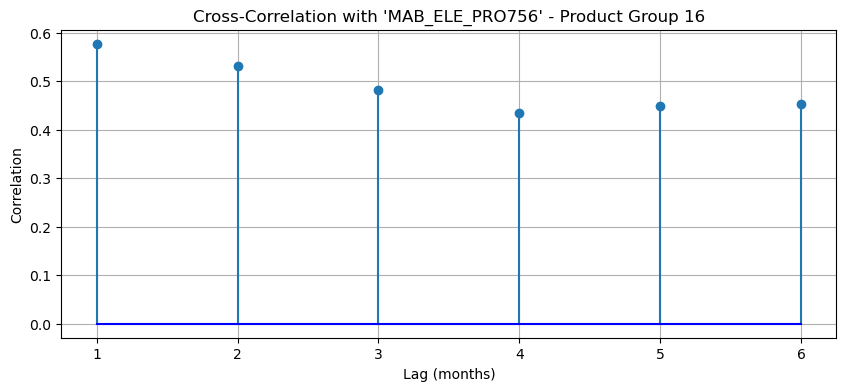

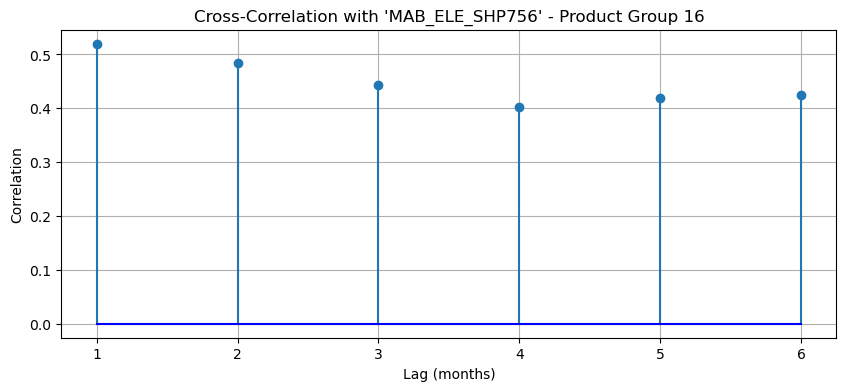

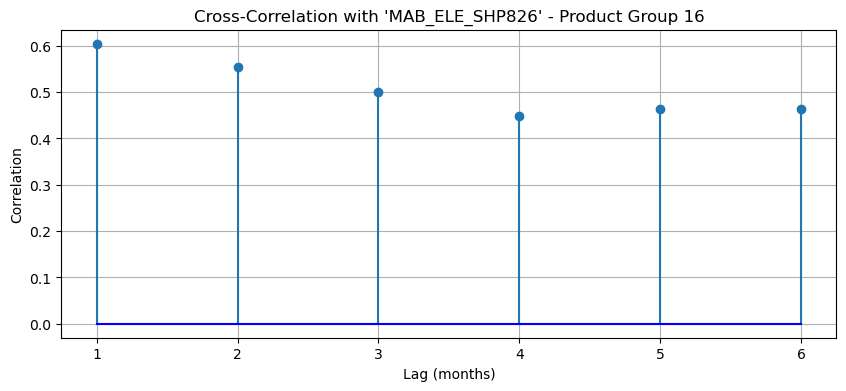

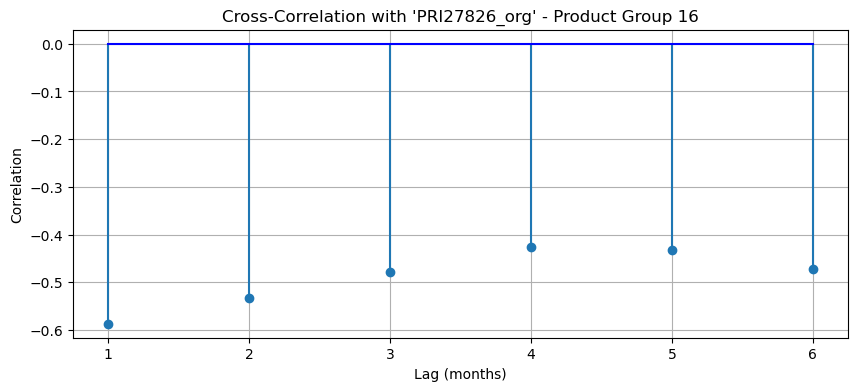

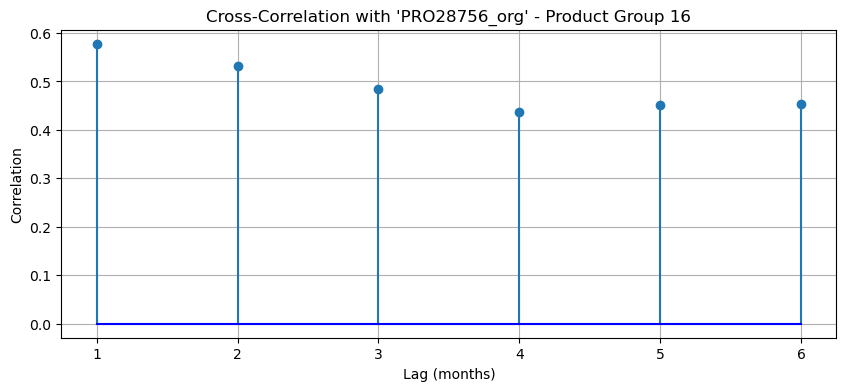

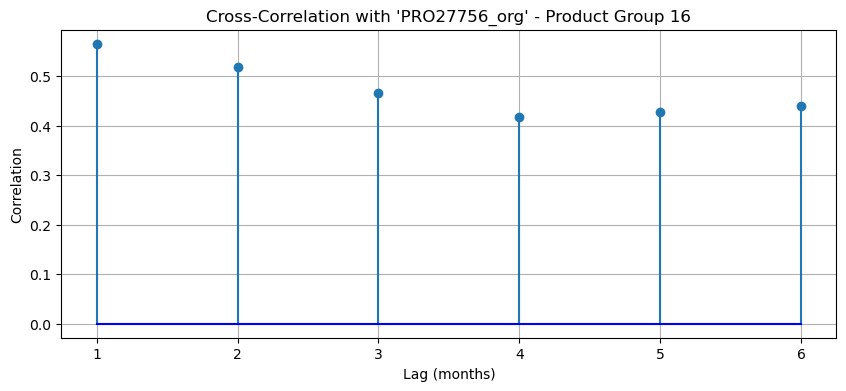

Selected Features for Product Group:
['MAB_ELE_PRO756', 'MAB_ELE_SHP756', 'MAB_ELE_SHP826', 'PRI27826_org', 'PRO28756_org', 'PRO27756_org']


In [125]:
relevant_corr_16, selected_features_16 = plot_cross_correlation(
    sales_df=sales_agg16,
    market_df=df_market,
    product_group=16,
    max_lag=6,
    threshold=0.5
)

In [126]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_16)]

filtered_info_market 

,Region,Index Name,Index Code
10,Switzerland,Production Index Machinery & Electricals,MAB_ELE_PRO756
11,Switzerland,Shipments Index Machinery & Electricals,MAB_ELE_SHP756
13,United Kingdom,Shipments Index Machinery & Electricals,MAB_ELE_SHP826
26,United Kingdom,Electrical equipment,PRI27826_org
33,Switzerland,Machinery and equipment n.e.c.,PRO28756_org
41,Switzerland,Electrical equipment,PRO27756_org


## Product Group 20

In [127]:
relevant_corr_20, selected_features_20 = plot_cross_correlation(
    sales_df=sales_agg20,
    market_df=df_market,
    product_group=20,
    max_lag=6,
    threshold=0.5
)

Selected Features for Product Group:
[]


In [128]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_20)]

filtered_info_market

,Region,Index Name,Index Code


## Product Group 36

In [129]:
relevant_corr_36, selected_features_36 = plot_cross_correlation(
    sales_df=sales_agg36,
    market_df=df_market,
    product_group=36,
    max_lag=6,
    threshold=0.5
)


Selected Features for Product Group:
[]


In [130]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_36)]

filtered_info_market

,Region,Index Name,Index Code


## aggregating the results

In [131]:
selected_feature_goup = list(set(selected_features_1 + selected_features_3 + selected_features_4 + selected_features_5 + selected_features_6 + selected_features_8 + selected_features_9 + selected_features_11 + selected_features_12 + selected_features_13 + selected_features_14 + selected_features_16 + selected_features_20 + selected_features_36))
print(len(selected_feature_goup))

filtered_info_market = info_market[info_market['Index Code'].isin(selected_feature_goup)]

filtered_info_market

26


,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
3,France,Shipments Index Machinery & Electricals,MAB_ELE_SHP250
8,Japan,Production Index Machinery & Electricals,MAB_ELE_PRO392
9,Japan,Shipments Index Machinery & Electricals,MAB_ELE_SHP392
10,Switzerland,Production Index Machinery & Electricals,MAB_ELE_PRO756
11,Switzerland,Shipments Index Machinery & Electricals,MAB_ELE_SHP756
12,United Kingdom,Production Index Machinery & Electricals,MAB_ELE_PRO826
13,United Kingdom,Shipments Index Machinery & Electricals,MAB_ELE_SHP826
15,United States,Shipments Index Machinery & Electricals,MAB_ELE_SHP840


# **Step 2** Feature slection using decision tree

In this step, we aim to minimize the set of features included in the model to avoid noise. This step helps us identify the relevant lags for the model and properly define the market data required for prediction to build the models effectively.

## preparation

In [132]:
selected_feature_goup
df_market_reduced = df_market[['date'] + selected_feature_goup]
df_market_reduced.head()
df_market_reduced = create_lag_features(df_market_reduced, 6)
df_market_reduced.head()


/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Feature_selection_Functions.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Feature_selection_Functions.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/Users/philippedutranoit/document_ordi/nova/business_case_for_data_scien

,date,PRO28756_org,PRO27826_org,PRO27392_org,RohCOPPER1000_org,PRO28392_org,MAB_ELE_SHP250,PRI27276_org,MAB_ELE_SHP392,MAB_ELE_PRO392,...,MAB_ELE_PRO826_lag_6,RohiMETMIN1000_org_lag_6,PRI27840_org_lag_6,RohiBASEMET1000_org_lag_6,MAB_ELE_SHP840_lag_6,MAB_ELE_SHP156_lag_6,PRO27756_org_lag_6,PRO271000_org_lag_6,MAB_ELE_PRO156_lag_6,PRO27276_org_lag_6
0,2004-02-01,96.177481,120.706516,106.161262,36.623832,110.890034,83.458866,93.230453,110.495272,109.334010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-03-01,96.250927,138.309550,140.288741,39.931055,141.176853,106.168192,93.335678,144.686166,140.884616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-04-01,96.330211,115.557330,106.271197,39.134854,105.648765,92.007646,93.440903,102.655769,105.853579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-05-01,96.413549,119.269534,101.608710,36.278433,101.990361,85.696486,93.546127,100.305285,101.864777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-06-01,96.499291,128.849416,116.655248,35.657380,122.136575,106.641482,93.440903,119.616380,120.332920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Product 1

In [133]:
selected_dt_features_1 = select_features_decision_tree(
    sales_df=sales_agg1,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_1


Selected features for Product Group 1:
PRO27826_org_lag_1      0.631356
PRO27826_org            0.154169
MAB_ELE_PRO756_lag_1    0.088309
PRI27380_org            0.055546
PRO271000_org_lag_5     0.030008
PRO27392_org_lag_3      0.017186
PRO28392_org_lag_6      0.016763
dtype: float64


['PRO27826_org_lag_1',
 'PRO27826_org',
 'MAB_ELE_PRO756_lag_1',
 'PRI27380_org',
 'PRO271000_org_lag_5',
 'PRO27392_org_lag_3',
 'PRO28392_org_lag_6']

# Product 3 

In [134]:
selected_dt_features_3 = select_features_decision_tree(
    sales_df=sales_agg3,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_3


Selected features for Product Group 1:
MAB_ELE_SHP840_lag_6    0.296972
WKLWEUR840_org_lag_5    0.261155
MAB_ELE_PRO826_lag_1    0.148116
PRO27826_org            0.104318
PRI27840_org_lag_5      0.054232
PRO28392_org_lag_6      0.041297
MAB_ELE_PRO826_lag_5    0.034375
MAB_ELE_SHP392_lag_5    0.028355
MAB_ELE_SHP392_lag_1    0.017871
MAB_ELE_SHP826_lag_3    0.010986
dtype: float64


['MAB_ELE_SHP840_lag_6',
 'WKLWEUR840_org_lag_5',
 'MAB_ELE_PRO826_lag_1',
 'PRO27826_org',
 'PRI27840_org_lag_5',
 'PRO28392_org_lag_6',
 'MAB_ELE_PRO826_lag_5',
 'MAB_ELE_SHP392_lag_5',
 'MAB_ELE_SHP392_lag_1',
 'MAB_ELE_SHP826_lag_3']

## Product 4

In [135]:
selected_dt_features_4 = select_features_decision_tree(
    sales_df=sales_agg4,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_4


Selected features for Product Group 1:
PRO27756_org_lag_5      0.335424
WKLWEUR840_org_lag_3    0.195018
PRI27276_org_lag_2      0.179008
PRO28392_org_lag_4      0.142237
MAB_ELE_PRO156_lag_4    0.054992
PRO28756_org_lag_6      0.037453
PRO28392_org_lag_1      0.035652
MAB_ELE_SHP392_lag_6    0.011521
dtype: float64


['PRO27756_org_lag_5',
 'WKLWEUR840_org_lag_3',
 'PRI27276_org_lag_2',
 'PRO28392_org_lag_4',
 'MAB_ELE_PRO156_lag_4',
 'PRO28756_org_lag_6',
 'PRO28392_org_lag_1',
 'MAB_ELE_SHP392_lag_6']

## Product 5


In [136]:
selected_dt_features_5 = select_features_decision_tree(
    sales_df=sales_agg5,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_5


Selected features for Product Group 1:
MAB_ELE_SHP250_lag_1    0.444101
PRO28392_org_lag_3      0.180119
MAB_ELE_SHP392          0.123362
MAB_ELE_PRO826_lag_5    0.113149
PRO271000_org_lag_5     0.087435
PRO27392_org            0.027155
PRI27840_org            0.010398
dtype: float64


['MAB_ELE_SHP250_lag_1',
 'PRO28392_org_lag_3',
 'MAB_ELE_SHP392',
 'MAB_ELE_PRO826_lag_5',
 'PRO271000_org_lag_5',
 'PRO27392_org',
 'PRI27840_org']

## Product 6

In [137]:
selected_dt_features_6 = select_features_decision_tree(
    sales_df=sales_agg6,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_6


Selected features for Product Group 1:
PRO27276_org            0.449332
MAB_ELE_PRO392_lag_5    0.203057
PRO27276_org_lag_1      0.173918
MAB_ELE_SHP250_lag_1    0.074393
WKLWEUR840_org_lag_2    0.055921
PRO28756_org            0.015123
PRI27250_org_lag_3      0.013815
MAB_ELE_SHP156_lag_4    0.010389
dtype: float64


['PRO27276_org',
 'MAB_ELE_PRO392_lag_5',
 'PRO27276_org_lag_1',
 'MAB_ELE_SHP250_lag_1',
 'WKLWEUR840_org_lag_2',
 'PRO28756_org',
 'PRI27250_org_lag_3',
 'MAB_ELE_SHP156_lag_4']

## Product 8

In [138]:
selected_dt_features_8 = select_features_decision_tree(
    sales_df=sales_agg8,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_8


Selected features for Product Group 1:
MAB_ELE_SHP840_lag_6    0.533032
PRO28392_org_lag_4      0.152697
MAB_ELE_SHP250_lag_3    0.149127
MAB_ELE_SHP250_lag_4    0.067738
WKLWEUR840_org_lag_1    0.032933
MAB_ELE_SHP392_lag_1    0.026832
PRO27826_org_lag_3      0.019337
PRO27392_org_lag_4      0.012256
dtype: float64


['MAB_ELE_SHP840_lag_6',
 'PRO28392_org_lag_4',
 'MAB_ELE_SHP250_lag_3',
 'MAB_ELE_SHP250_lag_4',
 'WKLWEUR840_org_lag_1',
 'MAB_ELE_SHP392_lag_1',
 'PRO27826_org_lag_3',
 'PRO27392_org_lag_4']

## Product 9

In [139]:
selected_dt_features_9 = select_features_decision_tree(
    sales_df=sales_agg9,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_9


Selected features for Product Group 1:
RohCOPPER1000_org_lag_6    0.474129
WKLWEUR840_org_lag_3       0.238323
MAB_ELE_SHP250_lag_3       0.134101
MAB_ELE_SHP840_lag_5       0.093288
WKLWEUR840_org_lag_4       0.031408
PRO27826_org_lag_1         0.028751
dtype: float64


['RohCOPPER1000_org_lag_6',
 'WKLWEUR840_org_lag_3',
 'MAB_ELE_SHP250_lag_3',
 'MAB_ELE_SHP840_lag_5',
 'WKLWEUR840_org_lag_4',
 'PRO27826_org_lag_1']

## Product 11

In [140]:
selected_dt_features_11 = select_features_decision_tree(
    sales_df=sales_agg11,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_11


Selected features for Product Group 1:
MAB_ELE_SHP392_lag_6    0.587578
MAB_ELE_SHP250_lag_5    0.145413
MAB_ELE_PRO826_lag_2    0.087077
MAB_ELE_SHP392_lag_5    0.085804
PRO27276_org_lag_5      0.035654
MAB_ELE_SHP756_lag_5    0.030242
PRO27826_org_lag_1      0.026094
dtype: float64


['MAB_ELE_SHP392_lag_6',
 'MAB_ELE_SHP250_lag_5',
 'MAB_ELE_PRO826_lag_2',
 'MAB_ELE_SHP392_lag_5',
 'PRO27276_org_lag_5',
 'MAB_ELE_SHP756_lag_5',
 'PRO27826_org_lag_1']

## Product 12

In [141]:
selected_dt_features_12 = select_features_decision_tree(
    sales_df=sales_agg12,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_12


Selected features for Product Group 1:
PRO27756_org_lag_3      0.525191
MAB_ELE_PRO826          0.200089
WKLWEUR840_org_lag_5    0.112110
MAB_ELE_PRO826_lag_3    0.091192
MAB_ELE_PRO156_lag_5    0.028723
PRO27392_org_lag_2      0.020060
MAB_ELE_SHP392_lag_5    0.019992
dtype: float64


['PRO27756_org_lag_3',
 'MAB_ELE_PRO826',
 'WKLWEUR840_org_lag_5',
 'MAB_ELE_PRO826_lag_3',
 'MAB_ELE_PRO156_lag_5',
 'PRO27392_org_lag_2',
 'MAB_ELE_SHP392_lag_5']

## Product 13

In [142]:
selected_dt_features_13 = select_features_decision_tree(
    sales_df=sales_agg13,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_13


Selected features for Product Group 1:
PRI27840_org                0.366809
WKLWEUR840_org_lag_3        0.221222
RohiMETMIN1000_org_lag_4    0.165738
PRO27276_org_lag_5          0.086162
PRO27276_org_lag_3          0.066025
RohCOPPER1000_org_lag_6     0.033767
PRI27380_org_lag_4          0.030303
MAB_ELE_PRO392_lag_4        0.023292
dtype: float64


['PRI27840_org',
 'WKLWEUR840_org_lag_3',
 'RohiMETMIN1000_org_lag_4',
 'PRO27276_org_lag_5',
 'PRO27276_org_lag_3',
 'RohCOPPER1000_org_lag_6',
 'PRI27380_org_lag_4',
 'MAB_ELE_PRO392_lag_4']

## Product 14

In [143]:
selected_dt_features_14 = select_features_decision_tree(
    sales_df=sales_agg14,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_14


Selected features for Product Group 1:
MAB_ELE_SHP156          0.468730
MAB_ELE_PRO826_lag_1    0.206677
PRO27392_org            0.117513
PRO27392_org_lag_2      0.114491
MAB_ELE_PRO156_lag_5    0.092588
dtype: float64


['MAB_ELE_SHP156',
 'MAB_ELE_PRO826_lag_1',
 'PRO27392_org',
 'PRO27392_org_lag_2',
 'MAB_ELE_PRO156_lag_5']

## Product 16

In [144]:
selected_dt_features_16 = select_features_decision_tree(
    sales_df=sales_agg16,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_16


Selected features for Product Group 1:
MAB_ELE_PRO756_lag_5    0.591356
RohiMETMIN1000_org      0.200176
PRI27840_org            0.087253
PRI27276_org            0.056247
RohCOPPER1000_org       0.031885
MAB_ELE_PRO156_lag_5    0.013199
MAB_ELE_SHP250_lag_1    0.010122
dtype: float64


['MAB_ELE_PRO756_lag_5',
 'RohiMETMIN1000_org',
 'PRI27840_org',
 'PRI27276_org',
 'RohCOPPER1000_org',
 'MAB_ELE_PRO156_lag_5',
 'MAB_ELE_SHP250_lag_1']

## Product 20

In [145]:
selected_dt_features_20 = select_features_decision_tree(
    sales_df=sales_agg20,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_20


Selected features for Product Group 1:
PRO27826_org_lag_1      0.378458
MAB_ELE_PRO156_lag_3    0.312656
PRO27826_org_lag_4      0.163509
PRO27276_org            0.043764
PRO271000_org_lag_5     0.031703
PRO27826_org_lag_5      0.029381
PRO27826_org_lag_6      0.016180
WKLWEUR840_org_lag_3    0.012256
dtype: float64


['PRO27826_org_lag_1',
 'MAB_ELE_PRO156_lag_3',
 'PRO27826_org_lag_4',
 'PRO27276_org',
 'PRO271000_org_lag_5',
 'PRO27826_org_lag_5',
 'PRO27826_org_lag_6',
 'WKLWEUR840_org_lag_3']

## Product 36

In [146]:
selected_dt_features_36 = select_features_decision_tree(
    sales_df=sales_agg36,
    market_df=df_market_reduced,
    product_group=1,
    importance_threshold=0.01,
    max_depth=4
)
selected_dt_features_36


Selected features for Product Group 1:
PRO27392_org_lag_1      0.939516
MAB_ELE_SHP392_lag_6    0.033306
MAB_ELE_SHP250_lag_5    0.010707
dtype: float64


['PRO27392_org_lag_1', 'MAB_ELE_SHP392_lag_6', 'MAB_ELE_SHP250_lag_5']

## aggragate

In [147]:
selected_dt_features = list(set(selected_dt_features_1 + selected_dt_features_3 + selected_dt_features_4 + selected_dt_features_5 + selected_dt_features_6 + selected_dt_features_8 + selected_dt_features_9 + selected_dt_features_11 + selected_dt_features_12 + selected_dt_features_13 + selected_dt_features_14 + selected_dt_features_16 + selected_dt_features_20 + selected_dt_features_36))
print(len(selected_dt_features))

# extract the index codes from the selected features for the market data prediction 
selected_features_index = extract_unique_index_codes(selected_dt_features)
print(len(selected_features_index))
selected_features_index


66
24


['PRO27392_org',
 'PRO27276_org',
 'MAB_ELE_PRO826',
 'MAB_ELE_SHP826',
 'MAB_ELE_PRO756',
 'PRO271000_org',
 'PRO28392_org',
 'MAB_ELE_SHP392',
 'MAB_ELE_PRO156',
 'MAB_ELE_PRO392',
 'MAB_ELE_SHP250',
 'PRO28756_org',
 'RohCOPPER1000_org',
 'PRO27756_org',
 'WKLWEUR840_org',
 'PRI27250_org',
 'PRO27826_org',
 'MAB_ELE_SHP756',
 'PRI27840_org',
 'MAB_ELE_SHP840',
 'PRI27380_org',
 'PRI27276_org',
 'RohiMETMIN1000_org',
 'MAB_ELE_SHP156']

In [148]:
filtered_info_market = info_market[info_market['Index Code'].isin(selected_features_index)]

filtered_info_market

,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
3,France,Shipments Index Machinery & Electricals,MAB_ELE_SHP250
8,Japan,Production Index Machinery & Electricals,MAB_ELE_PRO392
9,Japan,Shipments Index Machinery & Electricals,MAB_ELE_SHP392
10,Switzerland,Production Index Machinery & Electricals,MAB_ELE_PRO756
11,Switzerland,Shipments Index Machinery & Electricals,MAB_ELE_SHP756
12,United Kingdom,Production Index Machinery & Electricals,MAB_ELE_PRO826
13,United Kingdom,Shipments Index Machinery & Electricals,MAB_ELE_SHP826
15,United States,Shipments Index Machinery & Electricals,MAB_ELE_SHP840


# export

In [149]:
filtered_info_market.to_csv("../Data/filtered_info_market.csv", index=False)

# extract the selected features with the deccision tree so they can be called on the model notebook
pd.DataFrame(selected_dt_features_1, columns=['selected_features']).to_csv("../Data/selected_features_1.csv", index=False)
pd.DataFrame(selected_dt_features_3, columns=['selected_features']).to_csv("../Data/selected_features_3.csv", index=False)
pd.DataFrame(selected_dt_features_4, columns=['selected_features']).to_csv("../Data/selected_features_4.csv", index=False)
pd.DataFrame(selected_dt_features_5, columns=['selected_features']).to_csv("../Data/selected_features_5.csv", index=False)
pd.DataFrame(selected_dt_features_6, columns=['selected_features']).to_csv("../Data/selected_features_6.csv", index=False)
pd.DataFrame(selected_dt_features_8, columns=['selected_features']).to_csv("../Data/selected_features_8.csv", index=False)
pd.DataFrame(selected_dt_features_9, columns=['selected_features']).to_csv("../Data/selected_features_9.csv", index=False)
pd.DataFrame(selected_dt_features_11, columns=['selected_features']).to_csv("../Data/selected_features_11.csv", index=False)
pd.DataFrame(selected_dt_features_12, columns=['selected_features']).to_csv("../Data/selected_features_12.csv", index=False)
pd.DataFrame(selected_dt_features_13, columns=['selected_features']).to_csv("../Data/selected_features_13.csv", index=False)
pd.DataFrame(selected_dt_features_14, columns=['selected_features']).to_csv("../Data/selected_features_14.csv", index=False)
pd.DataFrame(selected_dt_features_16, columns=['selected_features']).to_csv("../Data/selected_features_16.csv", index=False)
pd.DataFrame(selected_dt_features_20, columns=['selected_features']).to_csv("../Data/selected_features_20.csv", index=False)
pd.DataFrame(selected_dt_features_36, columns=['selected_features']).to_csv("../Data/selected_features_36.csv", index=False)